In [1]:
import sys  
sys.path.insert(1, "..")
from hfsp_scripts import hfsp_functions as hfsp
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
from scipy import optimize
import networkx as nx
import pandas as pd

# Define variables for FT1

In [3]:
temp_sch_1wC = np.array([168])
temp_sch_2wC = np.array([336])
temp_sch_4wC = np.array([672])
temp_sch_1wCW = np.array([20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,8])
temp_sch_2wCW = np.array([20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,16])
temp_sch_4wCW = np.array([20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,
                          20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,12])
temp_sch_2wC_8hW = np.array([336,8])
temp_sch_2wC_24hW = np.array([336,24])
temp_sch_2wC_72hW = np.array([336,72])
      

# manual prediction/fitting from Rishi's data

p_cold = 0.0001
p_warm = 0.015
p_edge = 1 # we use MR0 to fit the parameters.
p_decay = 0


# Define g = the SAM template and also define the initial state.

In [4]:
T_3d = hfsp.create_tissue("../inputs/3d_sam.csv", True)
g = T_3d

# Initial state is alomost 0.94% active nodes (value 10WSD) == around 8 random cells activated in a 3D template.

TENwSD_state = np.concatenate((np.zeros(len(g.nodes()), dtype = int) , np.ones(len(g.edges()), dtype = int)))
TENwSD_state[0] = 1
TENwSD_state[100] = 1
TENwSD_state[200] = 1
TENwSD_state[300] = 1
TENwSD_state[400] = 1
TENwSD_state[500] = 1
TENwSD_state[600] = 1
TENwSD_state[700] = 1
TENwSD_state[800] = 1

hfsp.update_spontaneous(g, jump_state = TENwSD_state)

# Ok, now TENwSD_state is a random state with 0.93% active nodes

In [36]:
p_cold = 0.0005

In [37]:
hfsp.update_spontaneous(g, jump_state = TENwSD_state)

ens_1 = hfsp.ensemble(g, temp_sch_2wC, p_decay, p_cold, p_warm, p_edge, 
                   rule_code_node = [0,0.5], rule_code_edge = None, ensemble_size = 10, jump_state = TENwSD_state)

In [38]:
ens_1

,time,sim_1,sim_2,sim_3,sim_4,sim_5,sim_6,sim_7,sim_8,sim_9,sim_10,mean,std,upper,lower
0,0,1.055100,1.055100,1.055100,1.055100,1.055100,1.055100,1.055100,1.055100,1.055100,1.055100,1.055100,2.340556e-16,1.055100,1.055100
1,1,1.055100,1.055100,1.172333,1.172333,1.055100,1.172333,1.055100,1.055100,1.055100,1.055100,1.090270,5.662906e-02,1.125369,1.055171
2,2,1.172333,1.289566,1.289566,1.172333,1.172333,1.172333,1.055100,1.055100,1.172333,1.055100,1.160610,8.650232e-02,1.214224,1.106995
3,3,1.172333,1.289566,1.406800,1.289566,1.172333,1.289566,1.289566,1.055100,1.406800,1.172333,1.254396,1.112173e-01,1.323329,1.185463
4,4,1.172333,1.289566,1.406800,1.289566,1.172333,1.289566,1.289566,1.055100,1.406800,1.172333,1.254396,1.112173e-01,1.323329,1.185463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,332,18.991794,20.633060,26.846424,25.908558,15.826495,28.956624,25.556858,18.405627,27.784291,18.640094,22.754982,4.723547e+00,25.682667,19.827298
333,333,18.991794,20.984760,26.846424,27.080891,15.826495,29.073857,25.556858,18.405627,27.784291,18.757327,22.930832,4.812185e+00,25.913456,19.948209
334,334,18.991794,20.984760,26.963658,28.370457,15.826495,29.073857,25.556858,18.640094,27.784291,18.757327,23.094959,4.937116e+00,26.155015,20.034903
335,335,18.991794,21.219226,26.963658,29.894490,15.826495,29.191090,25.556858,18.757327,27.784291,18.757327,23.294256,5.129781e+00,26.473727,20.114784


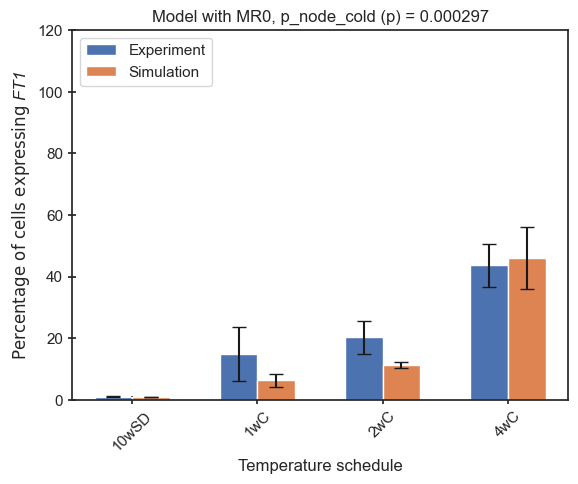

In [41]:
# manual fitting using 3D template.

# labels = ['10wSD', '1wC', '1wC/W', '2wC', '2wC/W', '4wC', '4wC/W']
labels = ['10 weeks of short days', '1 week cold', '1 week of cold/warm', '2 weeks of cold', '2 weeks of cold/warm', '4 weeks of cold', '4 weeks of cold/warm']
# labels_cold = ['10 weeks of short days', '1 week cold', '2 weeks of cold', '4 weeks of cold']
labels_cold = ['10wSD', '1wC', '2wC','4wC']
data_FT1 = [0.94, 14.78, 7.21, 20.25 , 15.94 , 43.71 , 12.62]
yerr_exp = [0.21, 15.25, 3.29, 9.28, 12, 12, 3.8]



sim = [1,9, 6.74, 19,11.8, 100, 21.8]
yerr_sim = [0 ,3 , 2, 3.15 , 2.8 , 0 ,8]

data_FT1_cold = [0.94, 14.78, 20.25, 43.71]
data_FT1_cold_err = [0.12, 8.8, 5.36, 7]

sim_cold1 = [1, 7.65, 15.04, 100] #0.0004
sim_cold1_err = [0, 2, 1, 0]

sim_cold2 = [1, 6.28, 11.17,46] # 0.0003
sim_cold2_err = [0, 2, 1, 10]

sim_cold3 = [1, 6.71, 13.4, 77.7] # 0.00035
sim_cold3_err = [0, 2, 1, 13]

sim_cold4 = [1, 9.29, 23.45, 100] # 0.0005
sim_cold4_err = [0, 2, 5, 0]

x = np.arange(len(labels_cold))  # the label locations
x_axis = np.arange(len(labels_cold))

# Multi bar Chart

sns.set()
sns.set_style("white")
fig, ax = plt.subplots()

# ax.bar(x_axis, data_FT1_cold, yerr = data_FT1_cold_err, width = 0.4, label = 'Experiment', capsize=10)

ax.bar(x_axis-0.15, data_FT1_cold, yerr = data_FT1_cold_err, width = 0.3,label = 'Experiment', capsize= 5)
ax.bar(x_axis+0.15, sim_cold2, yerr = sim_cold2_err, width=0.3, label = 'Simulation', capsize= 5)

ax.set_ylabel(r"$\rm{Percentage\ of\ cells\ expressing}$ FT1", font = "Arial", style = 'italic')
ax.set_xlabel("Temperature schedule")
# ax.set_title('Fitting simulations with FT1 RT-PCR data, using MR0', font = "Arial")
ax.set_title('Model with MR0, p_node_cold (p) = 0.000297', font = "Arial")
plt.xticks(x_axis, labels_cold, rotation = 45)
ax.tick_params(bottom = True, left = True, direction="inout")
plt.legend(loc='upper left')
ax.set_ylim(0, 120)

# Display
fig.savefig("hfsp_27feb_7.png", dpi = 600, bbox_inches = 'tight')
plt.show()

In [ ]:
# manual fitting using 3D template for GA20Ox-1 new data set.

labels = ['10wSD', '1wC', '2wC', '5wC']

Rishi_data_abi11 = [3, 2.41, 4, 13]
yerr_exp_abi11 = [0.80, 0.71, 0.45,	2.28]

Swanand_simulation_abi11 = [3,4,5,10]
yerr_sim_abi11 = [0 , 1 , 1.4, 1.7]


x = np.arange(len(labels))  # the label locations
x_axis = np.arange(len(labels))

# Multi bar Chart

sns.set()
sns.set_style("white")
fig, ax = plt.subplots()
ax.bar(x_axis-0.2, Rishi_data_abi11, width = 0.4, yerr = np.divide(yerr_exp_abi11, 1.73), label = 'Experiment')
ax.bar(x_axis+0.2, Swanand_simulation_abi11 , width=0.4, yerr = np.divide(yerr_sim_abi11, 1.73), label = 'Simulation')
ax.set_ylabel(r"% $\rm{of\ cells\ expressing}$ GA20Ox-1", font = "Arial", style = 'italic')
ax.set_xlabel("Temperature schedule")
ax.set_title('Fitting abi1-1 data for GA20Ox-1, p_cold = 0.00003', font = "Arial")
plt.xticks(x_axis, labels)
ax.tick_params(bottom = True, left = True, direction="inout")
plt.legend(loc='upper left')
# Display
plt.savefig("hfsp_fitting_oct23-3.png", dpi = 600)

plt.show()

In [ ]:
# manual fitting using 3D template for GA20Ox-1 new data set.

labels = ['10wSD','1wC', '2wC']

Rishi_data_2023_T89 = [1, 1.28, 7.7]

Rishi_data_2021_T89 = [1,1.7,3.8]



x = np.arange(len(labels))  # the label locations
x_axis = np.arange(len(labels))

# Multi bar Chart

sns.set()
sns.set_style("white")
fig, ax = plt.subplots()
ax.bar(x_axis-0.2, Rishi_data_2021_T89, width = 0.4, label = 'T89 exp data from 2021')
ax.bar(x_axis+0.2, Rishi_data_2023_T89 , width=0.4, label = 'T89 exp data from 2023')
ax.set_ylabel(r"% $\rm{of\ cells\ expressing}$ GA20Ox-1", font = "Arial", style = 'italic')
ax.set_xlabel("Temperature schedule")
ax.set_title('T89 data contrast between 2021 and 2023 for GA20Ox-1', font = "Arial")
plt.xticks(x_axis, labels)
ax.tick_params(bottom = True, left = True, direction="inout")
plt.legend(loc='upper left')
# Display
plt.savefig("hfsp_fitting_oct23-4.png", dpi = 600)

plt.show()